## 1. Insights


## 2. Implementation


### 2.1. Import dependecies

In [33]:

import os, sys, inspect
import time
import numpy as np
import pandas as pd
import matplotlib as mpl

# add parent dir to system dir
currdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
rootdir = os.path.dirname(currdir)
sys.path.insert(0, rootdir)

from newssentiment import TweetSentiments
from newssentiment.plot import Scatter
from newssentiment.plot import Bar


### 2.2. Setup run parameters

In [39]:

# set number of query tweets 
n_tweets = 1000
# set query outlets
outlets = ["@CNN", "@BBC", "@CBS", "@FoxNews", "@nytimes"]
colors = ["red", "green", "gold", "blue", "gray"] 
# set path to save figures
path_fig = os.path.join(rootdir, "reports", "figures")
path_log = os.path.join(rootdir, "reports", "logs")
# set true to save figures
save_fig = True
# set true to save results to csv
save_csv = True
# set true to log print
verbose = True
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['savefig.dpi'] = 150

In [3]:
# get/format current time
currtime = time.gmtime()
currtimestr = time.strftime("'%Y-%m-%d %H:%M (UTC)'", currtime) 


###  2.3. Get media tweets sentiments


In [4]:
sentiment = TweetSentiments(n_tweets=n_tweets)
df = sentiment.get_scores(queries=outlets)
df.head(10)

,Outlet,Date,Positive,Negative,Neutral,Compound,Tweets Ago
0,@CNN,Sun Jun 10 16:00:29 +0000 2018,0.263,0.737,0.000,0.6908,0
1,@CNN,Sun Jun 10 15:50:04 +0000 2018,0.000,0.782,0.218,-0.6486,1
2,@CNN,Sun Jun 10 15:38:01 +0000 2018,0.000,0.846,0.154,-0.4767,2
3,@CNN,Sun Jun 10 15:25:07 +0000 2018,0.000,1.000,0.000,0.0000,3
4,@CNN,Sun Jun 10 15:15:07 +0000 2018,0.336,0.664,0.000,0.8225,4
5,@CNN,Sun Jun 10 15:05:00 +0000 2018,0.000,0.862,0.138,-0.3400,5
6,@CNN,Sun Jun 10 14:55:05 +0000 2018,0.000,1.000,0.000,0.0000,6
7,@CNN,Sun Jun 10 14:44:05 +0000 2018,0.000,1.000,0.000,0.0000,7
8,@CNN,Sun Jun 10 14:33:50 +0000 2018,0.000,0.833,0.167,-0.5859,8
9,@CNN,Sun Jun 10 14:15:55 +0000 2018,0.172,0.828,0.000,0.3612,9



### 2.4. Save score data

In [ ]:
if save_csv:
    t = time.strftime("%Y-%m-%d-%H-%M", currtime) 
    df.to_csv(os.path.join(path_log, f"outlets-tweets-scores-{t}.csv"))

In [13]:
df.shape


(4998, 7)


### 2.5. Scatter plot

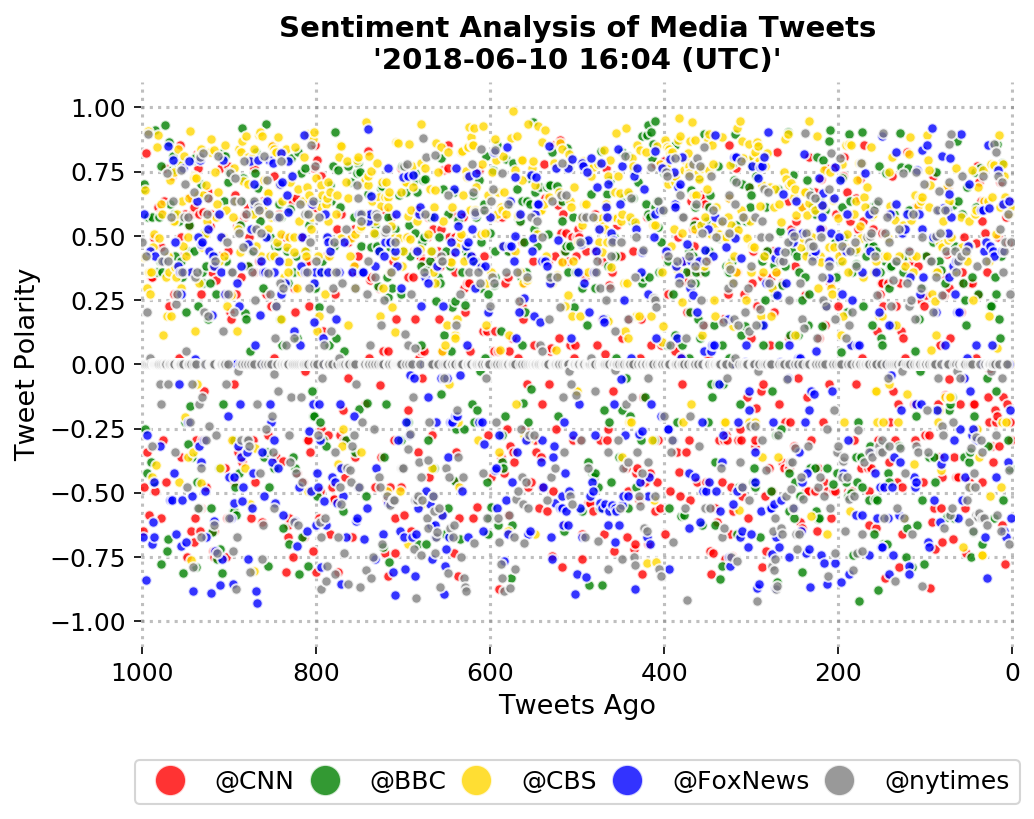

In [44]:
# time
x = df["Date"].map(lambda d: pd.to_datetime(d))[0:n_tweets]
x = np.linspace(n_tweets, 1, n_tweets)
title = f"Sentiment Analysis of Media Tweets" + os.linesep + f"{currtimestr}"

scatter = Scatter()
scatter.figsize = (8, 6)
scatter.dpi = 400
scatter.markersize = 5
scatter.markeredgewidth = 1
scatter.markeredgecolor = "white"
scatter.alpha = 0.8
scatter.xlim = [n_tweets+2, -2]
scatter.ylim = [-1.1, 1.1]
scatter.xlabel = "Tweets Ago"
scatter.ylabel = "Tweet Polarity"
scatter.title = title
# scatter.fig.patch.set_visible(False)
scatter.ax.spines['top'].set_visible(False)
scatter.ax.spines['right'].set_visible(False)
scatter.ax.spines['bottom'].set_visible(False)
scatter.ax.spines['left'].set_visible(False)

for outlet, color in zip(outlets, colors):
    scatter.markerfacecolor = color
    scatter.label = outlet
    outlet_compound_score = df["Compound"][df["Outlet"] == outlet]
    n_outlet_tweets = outlet_compound_score.shape[0]
    tweets_index = np.linspace(n_outlet_tweets, 1, n_outlet_tweets)
    scatter(tweets_index, outlet_compound_score)
scatter.ax.legend(loc="lower center",
                  bbox_to_anchor=(0.5, -0.3),
                  ncol=5,
                  markerscale=3,
                  fontsize=12,
                  columnspacing=0.2)

if save_fig:
    t = time.strftime("%Y-%m-%d-%H-%M", currtime) 
    scatter.fig.savefig(os.path.join(path_fig, f"compound-scatter-{t}"),
                        transparent=False, bbox_inches="tight")

### 2.6. Overall sentiments

In [9]:
# get overall average scores
gdf = df.groupby("Outlet")
mean_df = pd.DataFrame(gdf["Compound"].mean())
mean_df

,Compound
Outlet,
@BBC,0.133152
@CBS,0.334936
@CNN,0.035058
@FoxNews,0.010249
@nytimes,0.005965


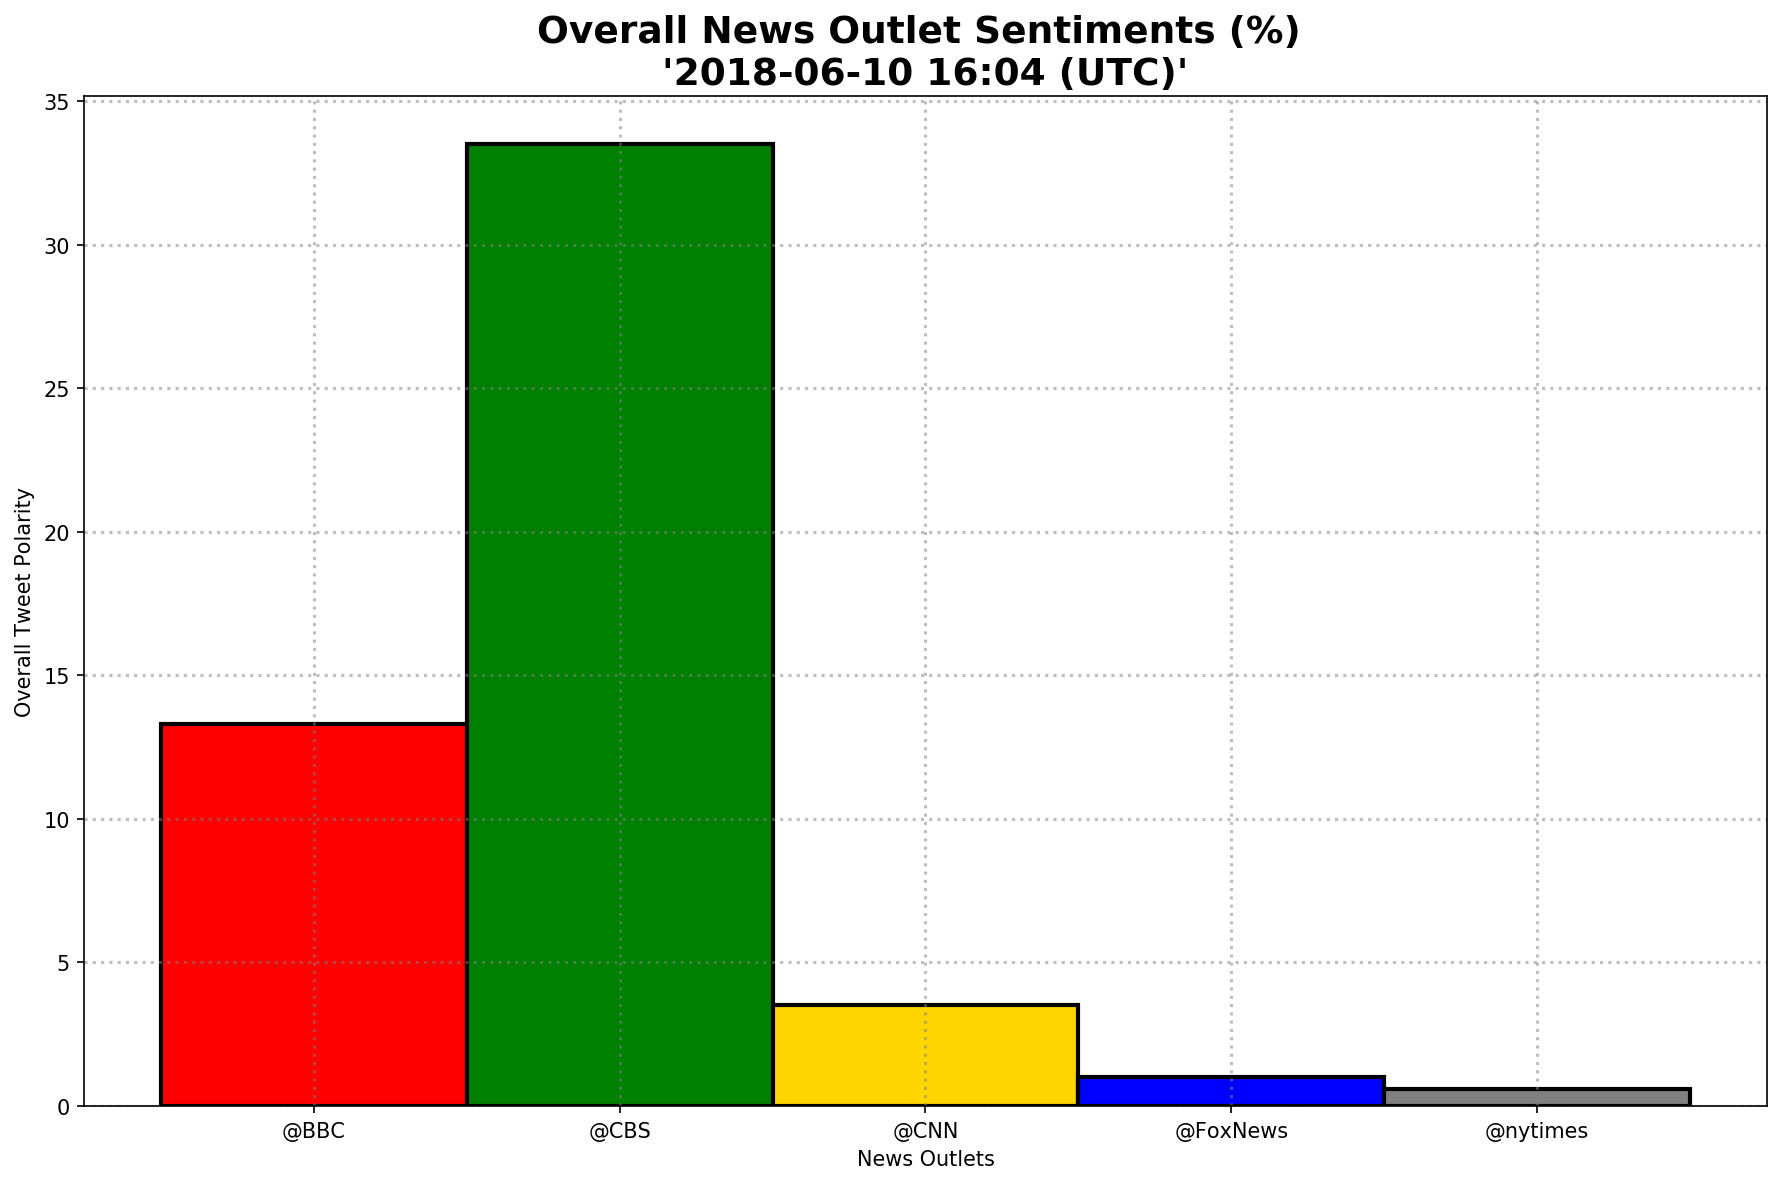

In [45]:
x = mean_df.index.values
y = mean_df["Compound"].values * 100
ylabel = "Overall Tweet Polarity"
xlabel = "News Outlets"
title = f"Overall News Outlet Sentiments (%) " + os.linesep + f"{currtimestr}"

bar = Bar()
bar.xlabelfontsize = 18
bar.titlefontsize = 18
bar.title = title
bar.ylabel = ylabel
bar.xlabel = xlabel
bar.alpha = 0.8 
bar(x=x, y=y, colors=colors) 

if save_fig:
    t = time.strftime("%Y-%m-%d-%H-%M", currtime)
    bar.fig.savefig(os.path.join(path_fig, f"sentiments-barchart-{t}"),
                        transparent=False, bbox_inches="tight")
